# Data Loading & Preprocessing

In [92]:
import pandas as pd
import numpy as np

In [93]:
df= pd.read_csv('kpi_anomaly_data.csv')
df.head()

,Date,Sales,Website_Traffic,Conversion_Rate,Customer_Churn,Marketing_Spend,Profit
0,2020-01-01,5496,11581,3.422985,2.633711,932,977
1,2020-01-02,4861,10298,2.835736,1.516053,721,1442
2,2020-01-03,5647,10838,3.366410,3.274799,1880,1689
3,2020-01-04,6523,13177,2.030993,0.681502,678,1522
4,2020-01-05,4765,15339,2.722927,1.967766,871,836


In [94]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index of the dataframe
df.set_index('Date', inplace=True)

In [95]:
print(df.isnull().sum())

Sales              0
Website_Traffic    0
Conversion_Rate    0
Customer_Churn     0
Marketing_Spend    0
Profit             0
dtype: int64


In [96]:
df.describe()

,Sales,Website_Traffic,Conversion_Rate,Customer_Churn,Marketing_Spend,Profit
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,5027.629275,12161.092339,2.547617,2.763749,986.289330,1118.397401
std,1138.567552,2830.087083,0.939195,1.422121,302.771328,355.884765
min,1264.000000,2384.000000,0.450667,0.265957,130.000000,163.000000
25%,4323.750000,10685.750000,1.965759,1.580787,782.250000,876.500000
50%,5046.000000,11990.500000,2.475222,2.703343,982.000000,1091.000000
75%,5684.750000,13414.250000,3.002507,3.901448,1197.000000,1332.000000
max,10978.000000,27898.000000,8.641774,9.679179,1929.000000,3489.000000


# Feature Engineering

### Extracting Date and Time Features

In [97]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Binary feature for weekends
df[['year', 'month', 'day', 'day_of_week', 'is_weekend']].head()


,year,month,day,day_of_week,is_weekend
Date,,,,,
2020-01-01,2020,1,1,2,0
2020-01-02,2020,1,2,3,0
2020-01-03,2020,1,3,4,0
2020-01-04,2020,1,4,5,1
2020-01-05,2020,1,5,6,1


### Lagging Feature

In [98]:
df['sales_lag_1'] = df['Sales'].shift(1)
df['sales_lag_2'] = df['Sales'].shift(2)
df['sales_lag_3'] = df['Sales'].shift(3)

print(df[['Sales', 'sales_lag_1', 'sales_lag_2', 'sales_lag_3']].head(10))

            Sales  sales_lag_1  sales_lag_2  sales_lag_3
Date                                                    
2020-01-01   5496          NaN          NaN          NaN
2020-01-02   4861       5496.0          NaN          NaN
2020-01-03   5647       4861.0       5496.0          NaN
2020-01-04   6523       5647.0       4861.0       5496.0
2020-01-05   4765       6523.0       5647.0       4861.0
2020-01-06   4765       4765.0       6523.0       5647.0
2020-01-07   6579       4765.0       4765.0       6523.0
2020-01-08   5767       6579.0       4765.0       4765.0
2020-01-09   4530       5767.0       6579.0       4765.0
2020-01-10   5542       4530.0       5767.0       6579.0


### Rolling Feature

In [99]:
df['sales_rolling_mean_7'] = df['Sales'].rolling(window=7).mean()
df['sales_rolling_std_7'] = df['Sales'].rolling(window=7).std()

print(df[['Sales', 'sales_rolling_mean_7', 'sales_rolling_std_7']].head(15))

            Sales  sales_rolling_mean_7  sales_rolling_std_7
Date                                                        
2020-01-01   5496                   NaN                  NaN
2020-01-02   4861                   NaN                  NaN
2020-01-03   5647                   NaN                  NaN
2020-01-04   6523                   NaN                  NaN
2020-01-05   4765                   NaN                  NaN
2020-01-06   4765                   NaN                  NaN
2020-01-07   6579           5519.428571           787.244532
2020-01-08   5767           5558.142857           792.545988
2020-01-09   4530           5510.857143           848.939815
2020-01-10   5542           5495.857143           847.058917
2020-01-11   4536           5212.000000           775.385066
2020-01-12   4534           5179.000000           802.037406
2020-01-13   5241           5247.000000           780.989116
2020-01-14   3086           4748.000000           895.577467
2020-01-15   3275       

### Handling Seasonality and Trend with decomposition

In [100]:
df['sales_ema_7'] = df['Sales'].ewm(span=7, adjust=False).mean()
print(df[['Sales', 'sales_ema_7']].head(15))

            Sales  sales_ema_7
Date                          
2020-01-01   5496  5496.000000
2020-01-02   4861  5337.250000
2020-01-03   5647  5414.687500
2020-01-04   6523  5691.765625
2020-01-05   4765  5460.074219
2020-01-06   4765  5286.305664
2020-01-07   6579  5609.479248
2020-01-08   5767  5648.859436
2020-01-09   4530  5369.144577
2020-01-10   5542  5412.358433
2020-01-11   4536  5193.268825
2020-01-12   4534  5028.451618
2020-01-13   5241  5081.588714
2020-01-14   3086  4582.691535
2020-01-15   3275  4255.768652


In [101]:
df['sales_diff'] = df['Sales'].diff()
print(df[['Sales', 'sales_diff']].head(10))

            Sales  sales_diff
Date                         
2020-01-01   5496         NaN
2020-01-02   4861      -635.0
2020-01-03   5647       786.0
2020-01-04   6523       876.0
2020-01-05   4765     -1758.0
2020-01-06   4765         0.0
2020-01-07   6579      1814.0
2020-01-08   5767      -812.0
2020-01-09   4530     -1237.0
2020-01-10   5542      1012.0


In [102]:
import numpy as np
from scipy.fft import fft

fft_sales = fft(df['Sales'].values)
df['fourier_sales'] = np.abs(fft_sales)

print(df[['Sales', 'fourier_sales']].head(10))

            Sales  fourier_sales
Date                            
2020-01-01   5496   7.350394e+06
2020-01-02   4861   5.390030e+04
2020-01-03   5647   4.622539e+04
2020-01-04   6523   3.970224e+04
2020-01-05   4765   1.135955e+04
2020-01-06   4765   2.842239e+04
2020-01-07   6579   7.188681e+04
2020-01-08   5767   5.351020e+04
2020-01-09   4530   3.274061e+04
2020-01-10   5542   8.483765e+04


###  Cyclic Encoding for Time Features

In [103]:
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)
df[['month', 'month_sin', 'month_cos', 'day_sin', 'day_cos']].head()

,month,month_sin,month_cos,day_sin,day_cos
Date,,,,,
2020-01-01,1,0.5,0.866025,0.201299,0.979530
2020-01-02,1,0.5,0.866025,0.394356,0.918958
2020-01-03,1,0.5,0.866025,0.571268,0.820763
2020-01-04,1,0.5,0.866025,0.724793,0.688967
2020-01-05,1,0.5,0.866025,0.848644,0.528964


In [104]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=df.index.min(), end=df.index.max())
df['is_holiday'] = df.index.isin(holidays).astype(int)

print(df[['is_holiday']].head())

            is_holiday
Date                  
2020-01-01           1
2020-01-02           0
2020-01-03           0
2020-01-04           0
2020-01-05           0


# Model Training

### Training Isolation Forest

In [106]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Selecting only numerical features
features = ['sales_rolling_mean_7', 'sales_rolling_std_7', 'sales_lag_1', 'sales_lag_2', 'sales_lag_3',
            'sales_ema_7', 'sales_diff', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'is_weekend', 'is_holiday']

# Feature Scaling (Improves performance)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Optimized Isolation Forest Model
iso_forest = IsolationForest(
    n_estimators=200,   # More trees for better accuracy
    contamination=0.02,  # Reduce threshold (capture more anomalies)
    max_samples='auto',  # Adaptive sampling
    random_state=42
)

# Train Model
iso_forest.fit(df_scaled)

# Predict anomalies (-1 = anomaly, 1 = normal)
df['anomaly_iforest'] = iso_forest.predict(df_scaled)
df['anomaly_iforest'] = df['anomaly_iforest'].apply(lambda x: 1 if x == -1 else 0)

# Number of anomalies detected
print("Updated Isolation Forest Anomalies:", df['anomaly_iforest'].sum())

Updated Isolation Forest Anomalies: 30


### Training Prophet

In [107]:
from prophet import Prophet

# Preparing data for Prophet
df_prophet = df.reset_index()[['Date', 'Sales']]
df_prophet.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)

# Initialize and Train Prophet Model
prophet = Prophet(
    seasonality_mode='multiplicative',  # Handles varying seasonal impact
    changepoint_prior_scale=0.05,  # Adjusting sensitivity to trend changes
)
prophet.fit(df_prophet)

# Make predictions
future = prophet.make_future_dataframe(periods=0)  
forecast = prophet.predict(future)

# Merge actual vs predicted
df['prophet_yhat'] = forecast['yhat'].values

# Calculate residuals
df['prophet_residual'] = abs(df['Sales'] - df['prophet_yhat'])

# Adjust anomaly threshold to 98th percentile (less sensitive)
threshold = df['prophet_residual'].quantile(0.98)
df['anomaly_prophet'] = df['prophet_residual'].apply(lambda x: 1 if x > threshold else 0)

# Number of anomalies detected
print("Updated Prophet Anomalies:", df['anomaly_prophet'].sum())

18:55:12 - cmdstanpy - INFO - Chain [1] start processing
18:55:12 - cmdstanpy - INFO - Chain [1] done processing


Updated Prophet Anomalies: 30


## Evaluating & Comparing the Models

In [108]:
# Ensemble Anomaly Detection (if both models agree, count it)
df['final_anomaly'] = df.apply(lambda row: 1 if row['anomaly_iforest'] == 1 or row['anomaly_prophet'] == 1 else 0, axis=1)

# Number of final anomalies detected
print("Final Combined Anomalies:", df['final_anomaly'].sum())

Final Combined Anomalies: 54


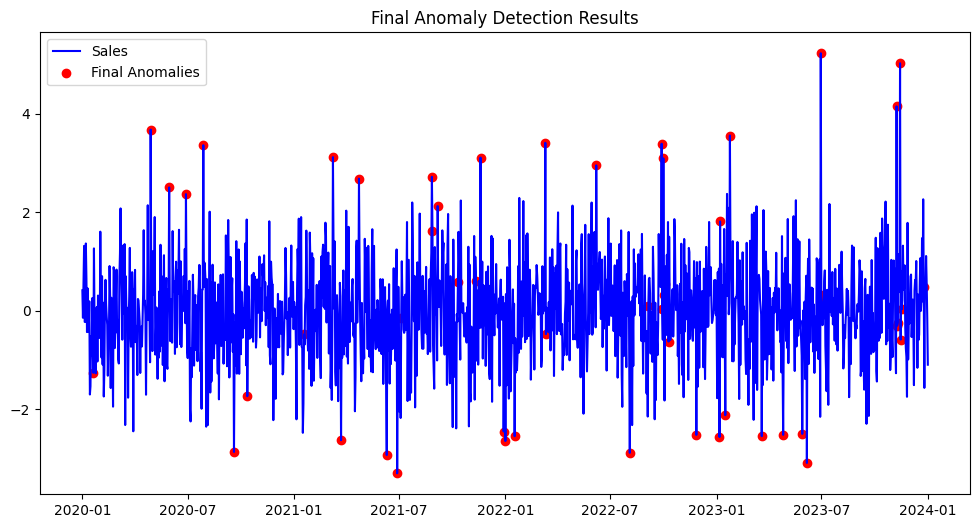

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Sales', color='blue')
plt.scatter(df[df['final_anomaly'] == 1].index, df[df['final_anomaly'] == 1]['Sales'], color='red', label='Final Anomalies')
plt.legend()
plt.title("Final Anomaly Detection Results")
plt.show()